#**A5- Visualization - Perceptual Mapping for Business**#

* **AUTHOR**     : Rakshitha Vignesh Sargurunathan               

* **VID**        : V01109007

* **CREATED ON** : 07/14/2024

**PROBLEM STATEMENT**: ANALYSIS OF COMSUMPTION IN THE STATE OF BIHAR(STATE CODE-10) And Visualizations


**ABOUT DATASET** : This dataset is about 68th round of National Sample Survey Organisation (NSSO) survey

In [1]:
#IMPORTING REQUIRED PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#READING ONLY BIHAR DATA FROM NSS068 DATSET
BiharData = pd.read_csv("/content/drive/MyDrive/SCMA/A1a/BiharData.csv")

In [4]:
BiharData.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,28969,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,75.000000,1751.572667,44.235150,Bhr,2,311.666667,403.533333
1,28970,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,8.333333,1054.882333,38.600350,Bhr,2,80.000000,184.050000
2,28971,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,4.285714,589.008429,29.118924,Bhr,2,0.000000,80.605714
3,28972,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,20.000000,747.565800,31.400921,Bhr,2,0.000000,91.600000
4,28973,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,8.000000,653.249000,30.060374,Bhr,2,8.000000,102.660000


In [5]:
BiharData.state.unique()

array([10])

In [6]:
BiharData.shape

(4582, 384)

In [39]:
#CHECK FOR MISSING VALUES
BiharData.isnull().sum().sort_values(ascending = False)

soyabean_q             4582
soyabean_v             4582
Otherwise_possessed    4407
Meals_School           4299
Meals_Employer         4284
                       ... 
cabbage_q                 0
cauli_q                   0
parwal_q                  0
bhindi_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [8]:
#SUBSETTING ONLY CONSUMPTION RELATED VARIABLES
Bhr = BiharData[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [9]:
Bhr.isnull().sum().sort_values(ascending = False)

Meals_At_Home       20
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

***INFERENCE*** : Among the subsetted consumption variables only "Meals_At_Home" variable consists of 20 missing values which has to be handled.

In [10]:
# HANDLING MISSING VALUES
Bhr_clean = Bhr.copy()
Bhr_clean.loc[:, 'Meals_At_Home'] = Bhr_clean['Meals_At_Home'].fillna(Bhr['Meals_At_Home'].mean())

In [11]:
#CHECKING FOR MISSING VALUES AFTER IMPUTATION
Bhr_clean.isnull().sum().sort_values(ascending = False)

state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
Meals_At_Home       0
dtype: int64

In [12]:
Bhr_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [14]:
#HANDLING OULIERS
food1 = Bhr_clean['foodtotal_q'].quantile(0.25)
food2 = Bhr_clean['foodtotal_q'].quantile(0.75)
iqr_food = food2-food1
up_limit = food2 + 1.5*iqr_food
low_limit = food1 - 1.5*iqr_food

Text(0.5, 1.0, 'Boxplot of foodtotal_q')

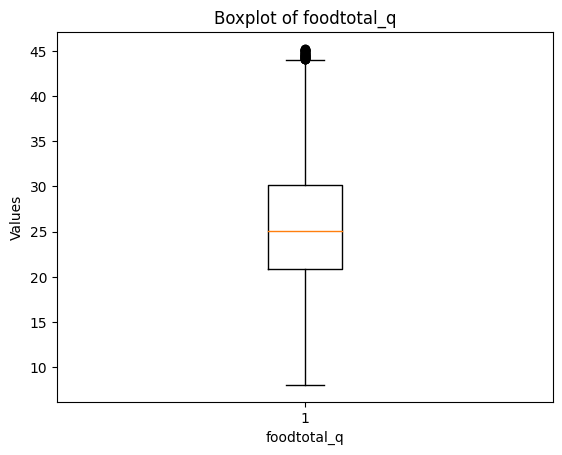

In [15]:
Bhr_clean=Bhr[(Bhr['foodtotal_q']<=up_limit)&(Bhr['foodtotal_q']>=low_limit)]
plt.boxplot(Bhr_clean['foodtotal_q'])
plt.xlabel('foodtotal_q')
plt.ylabel('Values')
plt.title('Boxplot of foodtotal_q')

In [16]:
#SUMMARIZING CRITICAL VARIABLES
Bhr_clean['District'].unique()

array([28, 36, 31, 32, 35, 30, 34, 33, 29, 37, 26, 22, 25, 24, 23, 27, 13,
        8,  9, 12,  7, 11, 10,  6, 14,  5, 18, 19, 17, 21, 20, 16, 15,  3,
        2,  1,  4, 38])

In [17]:
Bhr_clean.loc[:,'Sector'] = Bhr_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [18]:
#total consumption
Bhr_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [19]:
Bhr_clean.loc[:, 'total_consumption'] = Bhr_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [20]:
Bhr_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              20.192397  49.327415  197.383600  15.033400
2              22.285735  53.327699  249.275262  17.157214

In [21]:
#RENAMING DISTRICTS & SECTORS USING CODES FROM APPENDIX-NSSO68
district_mapping ={
    "1": "Pashchim Champaran", "2": "Purba Champaran", "3": "Sheohar", "4": "Sitamarhi", "5": "Madhubani", "6": "Supaul", "7": "Araria",
    "8": "Kishanganj", "9": "Purnia", "10": "Katihar", "11": "Madhepura", "12": "Saharsa", "13": "Darbhanga", "14": "Muzaffarpur",
    "15": "Gopalganj", "16": "Siwan", "17": "Saran", "18": "Vaishali", "19": "Samastipur", "20": "Begusarai", "21": "Khagaria",
    "22": "Bhagalpur","23": "Banka", "24": "Munger", "25": "Lakhisarai", "26": "Sheikhpura", "27": "Nalanda", "28": "Patna", "29": "Bhojpur",
    "30": "Buxar", "31": "Kaimur (Bhabua)", "32": "Rohtas", "33": "Jehanabad", "34": "Aurangabad", "35": "Gaya", "36": "Nawada", "37": "Jamui",
    "38": "Arwal"
}
total_consumption_by_districtname=Bhr_clean.groupby('District')['total_consumption'].sum()

In [22]:
Bhr_clean["District"] = Bhr_clean["District"].astype(str).replace(district_mapping)

In [23]:
Beveragestotal_v_by_districtname=Bhr_clean.groupby('District')['Beveragestotal_v'].sum()

In [24]:
#DISPLAYING TOP 3 AND LAST 3 DISTRICTS OF CONSUMPTION
total_consumption_by_districtcode=Bhr_clean.groupby('District')['total_consumption'].sum()

In [25]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
Patna              11274.654423
Muzaffarpur         7964.582825
Purba Champaran     7958.741776
Name: total_consumption, dtype: float64

In [26]:
total_consumption_by_districtcode.sort_values(ascending=False).tail(3)

District
Buxar      4147.367587
Sheohar    4137.102763
Arwal      3262.746554
Name: total_consumption, dtype: float64

#**A)Plot a histogram to show the distribution of total consumption across different districts of Bihar**

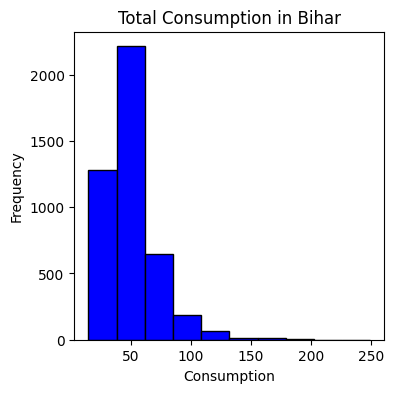

In [45]:
# Plot histogram of total consumption
plt.figure(figsize=(4, 4))
plt.hist(Bhr_clean["total_consumption"], bins=10, color='blue', edgecolor='black')
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.title("Total Consumption in Bihar")
plt.show()

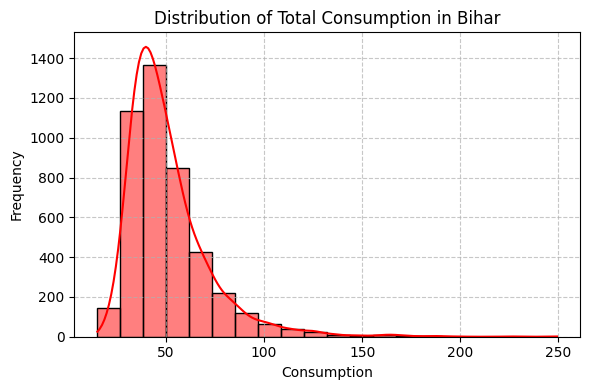

In [48]:
# Plot histogram with KDE overlay
plt.figure(figsize=(6, 4))
sns.histplot(Bhr_clean["total_consumption"], bins=20, kde=True, color='red', edgecolor='black')  # Histogram with KDE
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.title("Distribution of Total Consumption in Bihar")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# **Plot bar chart of total consumption per district of Bihar**

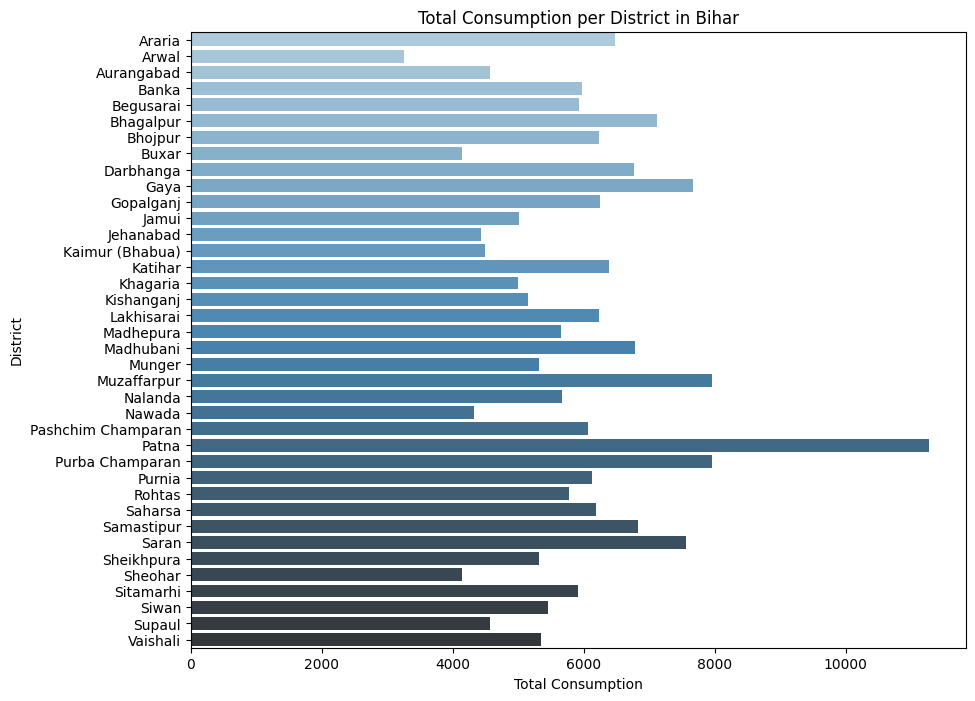

In [28]:
Bhr_consumption = Bhr_clean.groupby("District")["total_consumption"].sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='total_consumption', y='District', data=Bhr_consumption, palette="Blues_d")
plt.xlabel("Total Consumption")
plt.ylabel("District")
plt.title("Total Consumption per District in Bihar")
plt.show()

#**B)PLOT CONSUMPTION OF BEVERAGES ON BIHAR STATE MAP**

In [29]:
import geopandas as gpd

In [30]:
data_map = gpd.read_file("/content/drive/MyDrive/SCMA/A5-Visualization/BIHAR_DISTRICTS.geojson")


In [34]:
Bhr_Beverage_consumption = Bhr_clean.groupby("District")["Beveragestotal_v"].sum().reset_index()

In [35]:
data_map = data_map.rename(columns={"dtname": "District"})
data_map_Beveragedata = data_map.merge(Bhr_Beverage_consumption, on="District")

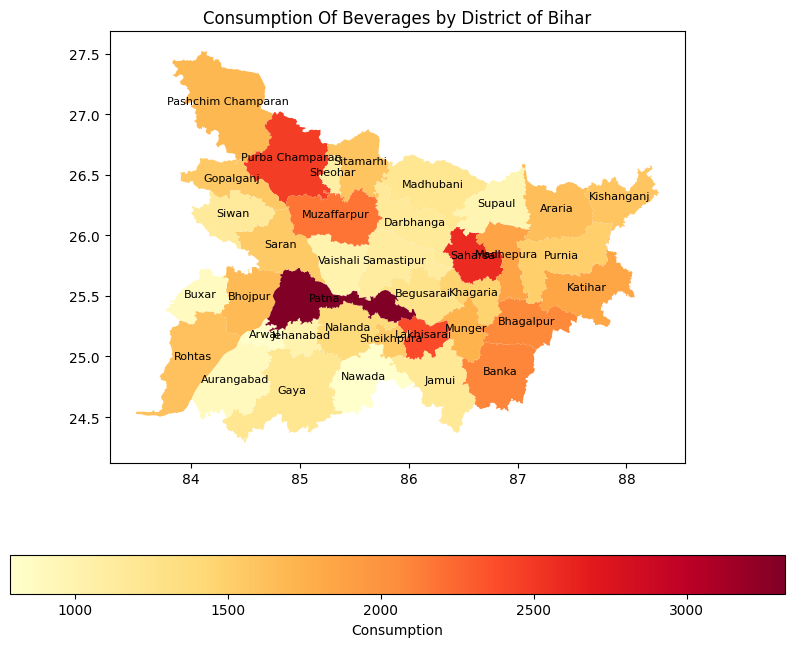

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
data_map_Beveragedata.plot(column="Beveragestotal_v", ax=ax, legend=True,
                           legend_kwds={'label': "Consumption",
                                       'orientation': "horizontal"},
                           cmap='YlOrRd')

data_map_data.apply(lambda x: ax.annotate(text=x.District, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='black'), axis=1)

plt.title("Consumption Of Beverages by District of Bihar")
plt.show()


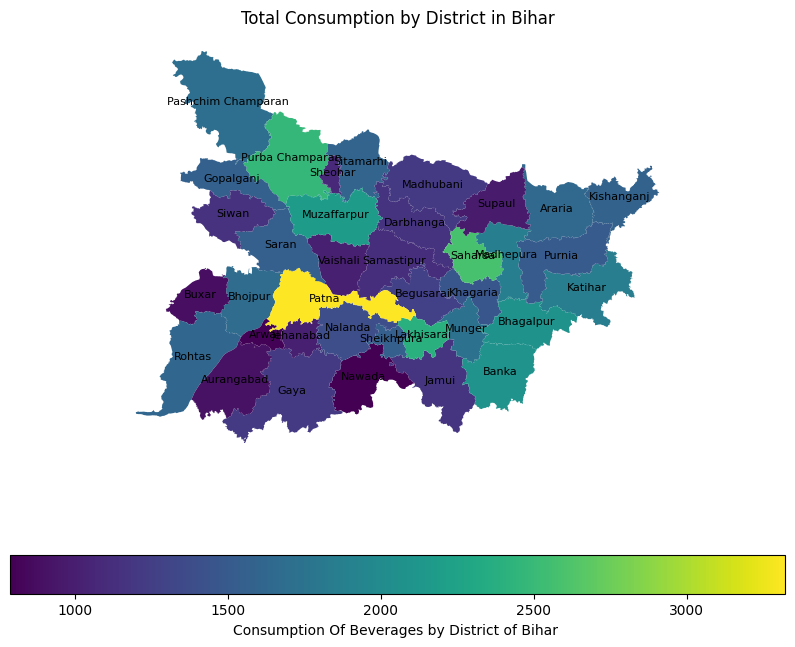

In [37]:
# Plot the map with consumption data and district labels
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
data_map_Beveragedata.plot(column="Beveragestotal_v", ax=ax, legend=True,
                   legend_kwds={'label': "Consumption Of Beverages by District of Bihar ",
                                'orientation': "horizontal"})
data_map_data.apply(lambda x: ax.annotate(text=x.District, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='black'), axis=1)
plt.title("Total Consumption by District in Bihar")
plt.axis("off")
plt.show()